Misbah Sabir
42101-5802137_4

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

**Load Data**

In [ ]:
df=pd.read_csv('BitCoin.csv')
df.head()

,Unnamed: 0,Open,Max,Min,Close,Volume,Margin,Date
0,0,357.00,364.98,356.00,362.06,627500.0,720.020,2015-01-01
1,1,363.00,369.88,363.00,367.85,1232500.0,731.865,2015-01-02
2,2,365.70,365.90,360.00,363.37,1228400.0,727.485,2015-01-05
3,3,361.00,362.48,356.10,356.84,1509000.0,718.210,2015-01-06
4,4,356.45,359.90,351.29,352.39,1524900.0,710.015,2015-01-07


In [ ]:
# Generate and add 'Date' column based on 'Timestamp'
df['Date']=pd.to_datetime(df['Timestamp'],unit='s').dt.date

# Group by 'Date' and calculate the mean of 'Weighted_Price' for each date
group= df.groupby('Date')
Real_Price=group['Weighted_Price'].mean()

In [ ]:
# now Split Data
pred_days=30

#create a training set (df_train) by selecting the last prediction_days days from the Real_Price time series.
df_train=Real_Price[len(Real_Price)-pred_days:]

#You create a testing set (df_test) by selecting all the days in Real_Price except the last prediction_days.
df_test=Real_Price[:len(Real_Price)-pred_days]


**Data Preproccessing**

In [ ]:
#Normalize the data
#Converts the 'df_train' pandas Series to a NumPy array.
training_set=df_train.values

#Reshapes the array to have one column, which is a common practice when working with time-series data.
training_set = np.reshape(training_set, (len(training_set), 1))

#Uses MinMaxScaler from scikit-learn to scale the data between 0 and 1.
sc=MinMaxScaler()
#Scaling is often important when working with neural networks, as it can improve convergence during training.
training_set = sc.fit_transform(training_set)

# Creates input sequences (X_train) and corresponding output sequences (y_train) for training.
#X_train contains the input sequences (all values except the last one)
X_train = training_set[:-1]

#y_train contains the corresponding output sequences (all values except the first one)
y_train = training_set[1:]
# Reshapes the input sequences (X_train) to have dimensions (number of samples, time steps, features).
X_train = np.reshape(X_train, (len(X_train), 1, 1))

NameError: ignored

In [ ]:
X_train.shape

(10, 1, 1)

In [ ]:
y_train.shape

(10, 1)

**Build the Model RNN**

In [ ]:
# Initialising the RNN
model = tf.keras.Sequential()

# Adding the input layer and the LSTM layer
model.add(tf.keras.layers.LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
model.add(tf.keras.layers.Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, batch_size = 2, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.5618
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5481
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5340
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5181
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5059
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4916
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4803
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4663
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4536
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4422
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4299
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4194
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have already defined and trained your model
# model = ...

# Extracting the test set
test_set = df_test.values[1:]

# Fitting the MinMaxScaler on the training data
sc = MinMaxScaler()
sc.fit(np.reshape(df_train.values, (len(df_train), 1)))

# Transforming the test set
inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

# Making predictions
predicted_BTC_price = model.predict(inputs)

# Inversely transforming the predicted values back to the original scale
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

1/1 [==============================] - 0s 186ms/step


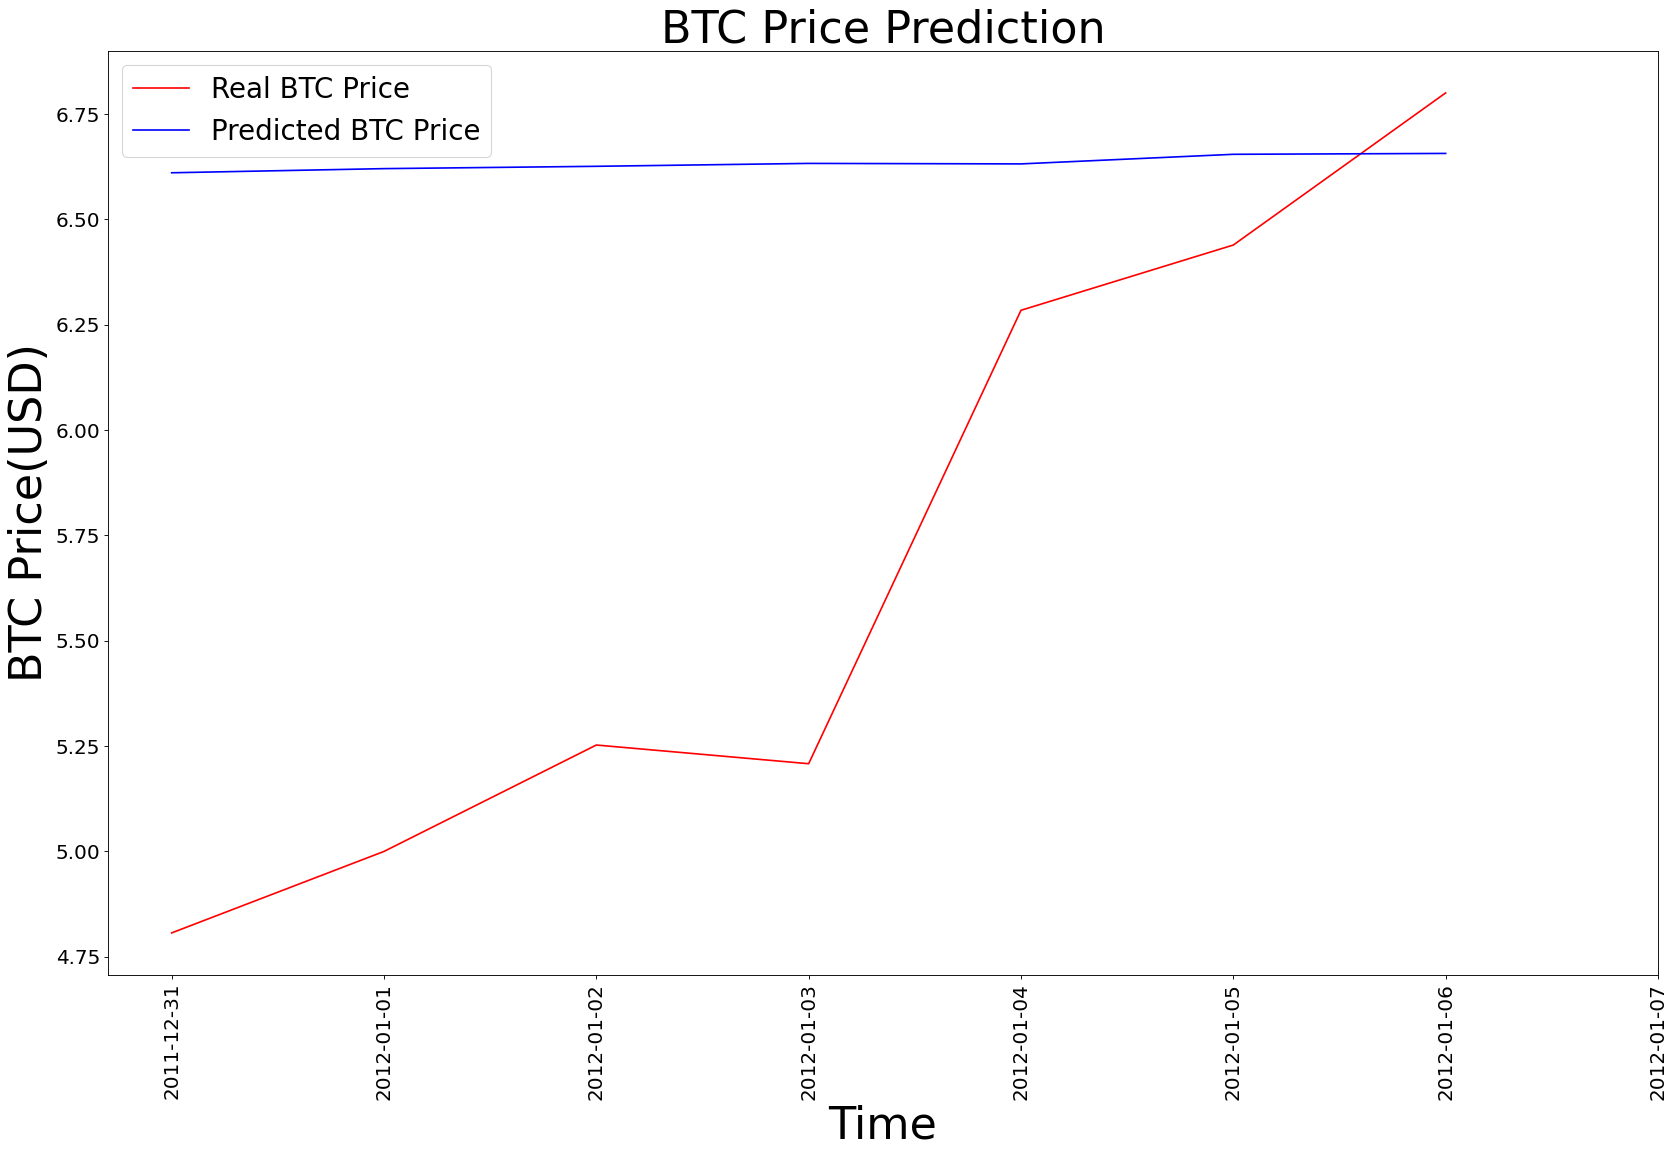

In [ ]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()